In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 23 16:33:17 2020

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-1-13b88862eb3d>, line 3)

In [2]:
@author: ka2461
"""

SyntaxError: invalid syntax (<ipython-input-2-f8f39467a08f>, line 1)

In [2]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal as ps
import geopandas as gpd
from sklearn import cluster
from sklearn.preprocessing import scale

C:\Users\user\anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [3]:
sns.set(style="whitegrid")

In [4]:
abb_link = 'C:\\Users\\user\\Desktop\\Arastirma Gorevi\\kodlar\\data_phyton\\data_codes.csv'
zc_link = 'C:\\Users\\user\\Desktop\\Arastirma Gorevi\\kodlar\\data_phyton\\lvl1-TR.geojson'

In [19]:
lst = pd.read_csv(abb_link)
lst.zipcode.astype(int)
  
price=[i for i in lst if 'price-' in i]
price
aves = lst.groupby('zipcode')[price].mean()
print(aves)

           price-1    price-2    price-3    price-4    price-5    price-6  \
zipcode                                                                     
1        33.253990  43.677734  45.336132  45.159160  15.231617  15.774555   
2        14.821420  14.709612  14.606618  13.942567  15.732105  16.335903   
3        15.186857  14.875222  14.733469  13.932967  16.740344  17.466745   
4        16.481372  17.901409  18.062152  17.650404  14.234502  14.656190   
5        13.545599  13.642769  13.586999  13.224634  13.429482  13.753278   
...            ...        ...        ...        ...        ...        ...   
77       28.219204  35.833110  37.022632  36.736893  15.199153  15.738143   
78       13.342889  13.339914  13.267607  12.905505  13.395826  13.715529   
79       39.192057  52.931191  55.142844  55.094669  15.266311  15.813468   
80       14.746925  14.327742  14.169892  13.409210  16.393790  17.078050   
81       19.553400  22.193015  22.550631  22.028336  15.487149  16.061159   

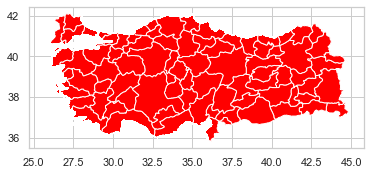

In [6]:

zc = gpd.read_file(zc_link)
zc.plot(color='red');

                                             geometry  zipcode       Name  \
0   MULTIPOLYGON (((26.05347 39.84736, 26.05347 39...        1  Çanakkale   
1   MULTIPOLYGON (((33.78607 40.96249, 33.78677 40...        2    Çankiri   
2   MULTIPOLYGON (((34.81906 41.20172, 34.84486 41...        3      Çorum   
3   MULTIPOLYGON (((35.27903 36.64069, 35.27903 36...        4      Adana   
4   MULTIPOLYGON (((38.65534 38.09172, 38.66739 38...        5   Adiyaman   
..                                                ...      ...        ...   
76  MULTIPOLYGON (((29.89273 38.77788, 29.89274 38...       77       Usak   
77  MULTIPOLYGON (((43.34184 39.39789, 43.35878 39...       78        Van   
78  MULTIPOLYGON (((29.39486 40.70208, 29.39486 40...       79     Yalova   
79  MULTIPOLYGON (((35.34320 40.21666, 35.35103 40...       80     Yozgat   
80  MULTIPOLYGON (((32.02097 41.56292, 32.02201 41...       81  Zinguldak   

      price-1    price-2    price-3    price-4    price-5    price-6  \
0  

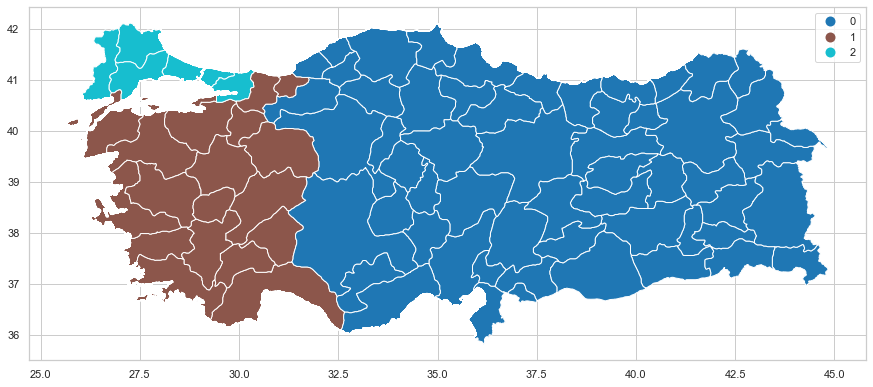

In [20]:
zdb = zc[['geometry', 'zipcode', 'Name']].join(aves, on='zipcode')\
                                         .dropna()

km5 = cluster.KMeans(n_clusters=3)
km5cls = km5.fit(zdb.drop(['geometry', 'Name'], axis=1).values)
km5cls.fit(aves)
zc.plot(column = km5cls.labels_, categorical = True, figsize = (15, 15), legend = True)

In [12]:
df1 = pd.DataFrame(zdb.drop(columns='geometry'))
df1['Labels'] = km5cls.labels_
list_0=[]
list_1=[]
list_2=[]
list_3=[]
list_4=[]

list_sum=[]
for j in range(len(df1)):
    if(df1['Labels'].iloc[j]==0):

        list_0.append(df1["price-9"].iloc[j].mean())

    elif(df1['Labels'].iloc[j]==1):

        list_1.append(df1["price-9"].iloc[j].mean())

    elif(df1['Labels'].iloc[j]==2):

        list_2.append(df1["price-9"].iloc[j].mean())

    elif(df1['Labels'].iloc[j]==3):

        list_3.append(df1["price-9"].iloc[j].mean())
    elif(df1['Labels'].iloc[j]==4):
         list_4.append(df1["price-9"].iloc[j].mean())
            
print("KMeans Method with 3 cluster")
print()
print("Label 0 Average Value: ",np.mean(list_0))
print("Label 0 Max Value: ",np.max(list_0))
print("Label 0 Min Value: ",np.min(list_0))
print("Label 0 Standard Dev Value: ",np.std(list_0))
print("Label 0 Variance Value: ",np.var(list_0))
print("Label 0 Median Value: ",np.median(list_0))
print("Label 0 Percentile Value: ",np.percentile(list_0,25))
print("Label 0 Percentile Value: ",np.percentile(list_0,75))
print("Label 1 Average Value: ",np.mean(list_1))
print("Label 1 Max Value: ",np.max(list_1))
print("Label 1 Min Value: ",np.min(list_1))
print("Label 1 Standard Dev Value: ",np.std(list_1))
print("Label 1 Variance Value: ",np.var(list_1))
print("Label 1 Median Value: ",np.median(list_1))
print("Label 1 Percentile Value: ",np.percentile(list_1,25))
print("Label 1 Percentile Value: ",np.percentile(list_1,75))
print("Label 2 Average Value: ",np.mean(list_2))
print("Label 2 Max Value: ",np.max(list_2))
print("Label 2 Min Value: ",np.min(list_2))
print("Label 2 Standard Dev Value: ",np.std(list_2))
print("Label 2 Variance Value: ",np.var(list_2))
print("Label 2 Median Value: ",np.median(list_2))
print("Label 2 Percentile Value: ",np.percentile(list_2,25))
print("Label 2 Percentile Value: ",np.percentile(list_2,75))

KMeans Method with 5 cluster

Label 0 Average Value:  62.47187662777779
Label 0 Max Value:  66.2943295
Label 0 Min Value:  56.14009179
Label 0 Standard Dev Value:  3.4663993874876744
Label 0 Variance Value:  12.015924713574924
Label 0 Median Value:  64.41505072
Label 0 Percentile Value:  60.99796445
Label 0 Percentile Value:  64.9395824
Label 1 Average Value:  20.668118823947367
Label 1 Max Value:  31.89581151
Label 1 Min Value:  9.26975644
Label 1 Standard Dev Value:  4.2409682289221715
Label 1 Variance Value:  17.985811518727257
Label 1 Median Value:  19.86078137
Label 1 Percentile Value:  18.010769800000002
Label 1 Percentile Value:  23.37114321
Label 2 Average Value:  44.89775938733333
Label 2 Max Value:  52.10256848
Label 2 Min Value:  35.75021836
Label 2 Standard Dev Value:  4.781984417930728
Label 2 Variance Value:  22.86737497333228
Label 2 Median Value:  44.43317417
Label 2 Percentile Value:  42.208458275
Label 2 Percentile Value:  48.175348965


KMeans Method with 4 cluster

Label 0 Average Value:  25.9842410626087
Label 0 Max Value:  37.62112575
Label 0 Min Value:  20.72012208
Label 0 Standard Dev Value:  4.116364548537813
Label 0 Variance Value:  16.944457096458915
Label 0 Median Value:  25.22159272
Label 0 Percentile Value:  23.328930315
Label 0 Percentile Value:  26.922619255
Label 1 Average Value:  18.161571462083334
Label 1 Max Value:  22.86905695
Label 1 Min Value:  9.26975644
Label 1 Standard Dev Value:  2.759610807505768
Label 1 Variance Value:  7.615451808902636
Label 1 Median Value:  18.060138115
Label 1 Percentile Value:  17.838432694999998
Label 1 Percentile Value:  18.8689890375
Label 2 Average Value:  64.36328768199999
Label 2 Max Value:  65.16207939
Label 2 Min Value:  62.80497832
Label 2 Standard Dev Value:  0.8268582683079712
Label 2 Variance Value:  0.6836945958692568
Label 2 Median Value:  64.49474758
Label 2 Percentile Value:  64.41505072
Label 2 Percentile Value:  64.9395824
Label 3 Average Value:  49.442

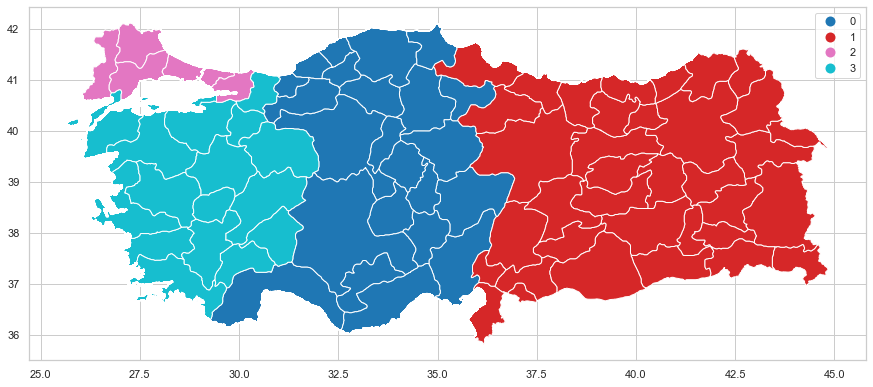

In [21]:
km2 = cluster.KMeans(n_clusters=4)
km2cls = km2.fit(zdb.drop(['geometry', 'Name'], axis=1).values)
km2cls.fit(aves)
zc.plot(column = km2cls.labels_, categorical = True, figsize = (15, 15), legend = True)
df1 = pd.DataFrame(zdb.drop(columns='geometry'))
df1['Labels'] = km2cls.labels_
list_0=[]
list_1=[]
list_2=[]
list_3=[]
list_4=[]

list_sum=[]
for j in range(len(df1)):
    if(df1['Labels'].iloc[j]==0):

        list_0.append(df1["price-9"].iloc[j].mean())

    elif(df1['Labels'].iloc[j]==1):

        list_1.append(df1["price-9"].iloc[j].mean())

    elif(df1['Labels'].iloc[j]==2):

        list_2.append(df1["price-9"].iloc[j].mean())

    elif(df1['Labels'].iloc[j]==3):

        list_3.append(df1["price-9"].iloc[j].mean())
    elif(df1['Labels'].iloc[j]==4):
         list_4.append(df1["price-9"].iloc[j].mean())
            
print("KMeans Method with 4 cluster")
print()
print("Label 0 Average Value: ",np.mean(list_0))
print("Label 0 Max Value: ",np.max(list_0))
print("Label 0 Min Value: ",np.min(list_0))
print("Label 0 Standard Dev Value: ",np.std(list_0))
print("Label 0 Variance Value: ",np.var(list_0))
print("Label 0 Median Value: ",np.median(list_0))
print("Label 0 Percentile Value: ",np.percentile(list_0,25))
print("Label 0 Percentile Value: ",np.percentile(list_0,75))
print("Label 1 Average Value: ",np.mean(list_1))
print("Label 1 Max Value: ",np.max(list_1))
print("Label 1 Min Value: ",np.min(list_1))
print("Label 1 Standard Dev Value: ",np.std(list_1))
print("Label 1 Variance Value: ",np.var(list_1))
print("Label 1 Median Value: ",np.median(list_1))
print("Label 1 Percentile Value: ",np.percentile(list_1,25))
print("Label 1 Percentile Value: ",np.percentile(list_1,75))
print("Label 2 Average Value: ",np.mean(list_2))
print("Label 2 Max Value: ",np.max(list_2))
print("Label 2 Min Value: ",np.min(list_2))
print("Label 2 Standard Dev Value: ",np.std(list_2))
print("Label 2 Variance Value: ",np.var(list_2))
print("Label 2 Median Value: ",np.median(list_2))
print("Label 2 Percentile Value: ",np.percentile(list_2,25))
print("Label 2 Percentile Value: ",np.percentile(list_2,75))
print("Label 3 Average Value: ",np.mean(list_3))
print("Label 3 Max Value: ",np.max(list_3))
print("Label 3 Min Value: ",np.min(list_3))
print("Label 3 Standard Dev Value: ",np.std(list_3))
print("Label 3 Variance Value: ",np.var(list_3))
print("Label 3 Median Value: ",np.median(list_3))
print("Label 3 Percentile Value: ",np.percentile(list_3,25))
print("Label 3 Percentile Value: ",np.percentile(list_3,75))

In [98]:
km3 = cluster.KMeans(n_clusters=3)
km3cls = km3.fit(zdb.drop(['geometry', 'Name'], axis=1).values)
km3cls.fit(aves)
df3 = pd.DataFrame(zrt.drop(columns='geometry'))
df3['Labels'] = km3cls.labels_
list_0=[]
list_1=[]
list_2=[]

list_sum=[]
for j in range(len(df3)):
    if(df3['Labels'].iloc[j]==0):

        list_0.append(df3["price-9"].iloc[j].mean())

    elif(df3['Labels'].iloc[j]==1):

        list_1.append(df3["price-9"].iloc[j].mean())
    elif(df3['Labels'].iloc[j]==2):

        list_2.append(df3["price-9"].iloc[j].mean())

print("KMeans Method with 3 cluster")
print()
print("Label 0 Average Value: ",np.mean(list_0))
print("Label 1 Average Value: ",np.mean(list_1))
print("Label 2 Average Value: ",np.mean(list_2))

KMeans Method with 3 cluster

Label 0 Average Value:  20.668118823947367
Label 1 Average Value:  44.89775938733333
Label 2 Average Value:  62.47187662777779


In [27]:
zrt = zdb
zrt.to_file('tmp')
w = ps.queen_from_shapefile('tmp/tmp.shp', idVariable='zipcode')
# NOTE: this might not work on Windows
#! rm -r tmp
n_rev = aves
p = np.ones((w.n,1), float)
           
thr = 30

AttributeError: module 'pysal' has no attribute 'queen_from_shapefile'

In [31]:
np.random.seed(1234)

In [32]:
z = zrt.drop(['geometry', 'zipcode','Name'], axis=1).values
maxp = ps.region.Maxp(w, z, thr, n_rev.values[:, None], initial=40)

AttributeError: module 'pysal' has no attribute 'region'

In [33]:
np.random.seed(1234)
maxp.cinference(nperm=999)
maxp.cpvalue

NameError: name 'maxp' is not defined

In [34]:
lbls = pd.Series(maxp.area2region).reindex(zrt['zipcode'])
f, ax = plt.subplots(1, figsize=(9, 9))

NameError: name 'maxp' is not defined

In [35]:
zrt.assign(cl=lbls.values)\
   .plot(column='cl', categorical=True, legend=True, \
         linewidth=0.1, edgecolor='white', ax=ax)

NameError: name 'lbls' is not defined

In [36]:
ax.set_axis_off()

In [37]:
plt.show()